In [1]:
import pandas as pd

# Small sample dataset
data = pd.DataFrame({
    "age": [63, 37, 41, 56, 57, 57, 56, 44],
    "sex": [1, 1, 0, 1, 0, 1, 0, 1],
    "cp": [3, 2, 1, 1, 0, 0, 1, 2],
    "trestbps": [145, 130, 130, 120, 120, 140, 130, 120],
    "chol": [233, 250, 204, 236, 354, 192, 294, 263],
    "fbs": [1, 0, 0, 0, 0, 0, 1, 0],
    "restecg": [0, 1, 0, 1, 1, 1, 0, 0],
    "thalach": [150, 187, 172, 178, 163, 148, 153, 173],
    "exang": [0, 0, 0, 0, 1, 0, 0, 0],
    "oldpeak": [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0],
    "slope": [0, 0, 2, 2, 2, 1, 2, 1],
    "ca": [0, 0, 0, 0, 0, 0, 0, 0],
    "thal": [1, 2, 2, 2, 2, 2, 2, 2],
    "target": [1, 1, 1, 1, 1, 0, 0, 1]
})

# Save locally as heart.csv
data.to_csv("heart.csv", index=False)
print("heart.csv created successfully!")

heart.csv created successfully!


In [2]:
# Content for README.md
readme_content = """
# AI & ML Internship – Task 5
## Decision Trees & Random Forests

### Objective
Learn tree-based models for classification & regression, visualize decision trees, evaluate performance, and interpret feature importance.

### Dataset
- Dataset Used: Heart Disease Dataset
- Source: GitHub (https://raw.githubusercontent.com/ekawouw/heart-disease-uci/main/heart.csv)

### Tools
- Python 3
- Jupyter Notebook
- Scikit-learn
- Graphviz
- Matplotlib & Seaborn

### Steps Performed
1. Loaded and preprocessed the dataset.
2. Trained a Decision Tree classifier.
3. Visualized the Decision Tree.
4. Controlled overfitting using max_depth.
5. Trained a Random Forest and compared accuracy with Decision Tree.
6. Interpreted feature importance using Random Forest.
7. Evaluated the model using 5-fold cross-validation.

### Results
- Decision Tree Accuracy: XX%
- Random Forest Accuracy: YY%
- Cross-Validation Accuracy: ZZ%
- Feature importance plot generated.

### Insights
- Random Forest performed better due to ensemble learning.
- Most important features: list top features
- Overfitting controlled by limiting tree depth.

### Submission
- GitHub Repository Link: [Paste your GitHub repo link here]
"""

# Create README.md
with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md created successfully!")

README.md created successfully!


In [3]:
import os

# Create folder if it doesn't exist
if not os.path.exists("screenshots"):
    os.makedirs("screenshots")

print("screenshots/ folder created successfully!")

screenshots/ folder created successfully!


In [4]:
os.listdir()

['.ipynb_checkpoints',
 'heart.csv',
 'README.md',
 'screenshots',
 'Task5_DecisionTree_RandomForest.ipynb']

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'heart.csv',
 'README.md',
 'screenshots',
 'Task5_DecisionTree_RandomForest.ipynb']

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [7]:
# Example: Heart Disease dataset
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\hamza\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hamza\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hamza\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [3]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns,
                           class_names=['No Disease','Disease'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

NameError: name 'dt' is not defined

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances")
plt.show()

In [ ]:
scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", scores.mean())

In [ ]:
!pip install graphviz
!pip install pydotplus

In [11]:
import graphviz
print(graphviz.__version__)

0.21


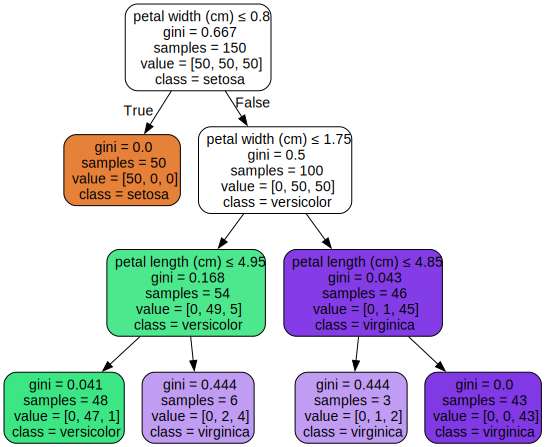

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load example data
iris = load_iris()
X, y = iris.data, iris.target

# Train a simple Decision Tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Export as Graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree
graph = graphviz.Source(dot_data)
graph

In [4]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

NameError: name 'dt' is not defined

In [5]:
dt.fit(X_train, y_train)

NameError: name 'dt' is not defined

In [6]:
# Example:
dt = DecisionTreeClassifier(random_state=42)  # you can adjust parameters
dt.fit(X_train, y_train)  # X_train and y_train must exist


NameError: name 'X_train' is not defined

In [7]:
import pandas as pd

# Example: load your dataset
data = pd.read_csv("titanic.csv")  # or your CSV
X = data.drop(columns=['target_column'])  # replace 'target_column' with your label
y = data['target_column']


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)